# PERFUMES

### Limpieza de datos

In [1]:
# Cargamos la base de datos perfume data.csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [2]:


# Carga del archivo CSV
df2 = pd.read_csv('final_perfume_data.csv', encoding='latin1')




In [3]:
# Tipos de datos
print(df2.dtypes)

Name           object
Brand          object
Description    object
Notes          object
Image URL      object
dtype: object


In [4]:
# Creamos una columna que se llame type en df2
df2['type'] = 'perfume'

In [5]:


# Separar la columna 'name' en dos columnas, 'nombre' y 'type'
df2[['Name', 'type']] = df2['Name'].str.rsplit(' ', n=3, expand=True).iloc[:, [0, -3]]

# Mostrar el DataFrame resultante
print(df2)

                       Name                   Brand  \
0                    Tihota                  Indult   
1                      Sola                  Di Ser   
2                   Kagiroi                  Di Ser   
3            Velvet Fantasy                 Montale   
4     A Blvd. Called Sunset           A Lab on Fire   
...                     ...                     ...   
2186           Perfect Veil  Sarah Horowitz Parfums   
2187                  Scent        Costume National   
2188                 Bronze              Nanadebary   
2189               Monyette          Monyette Paris   
2190                   1270                  Frapin   

                                            Description  \
0      Rapa Nui for sugar, Tihota is, quite simply, ...   
1      A tribute to the expanse of space extending f...   
2      An aromatic ode to the ancient beauty of Japa...   
3      Velvet Fantasy is a solar fragrance where cit...   
4      There's no way A Lab On Fire could re

In [6]:


# Asegúrate de que aplicamos 'split' solo a cadenas no nulas
df2['Notes'] = df2['Notes'].apply(lambda x: [item.strip() for item in x.split(',')] if isinstance(x, str) else x)

# Ver el DataFrame resultante
print(df2)

                       Name                   Brand  \
0                    Tihota                  Indult   
1                      Sola                  Di Ser   
2                   Kagiroi                  Di Ser   
3            Velvet Fantasy                 Montale   
4     A Blvd. Called Sunset           A Lab on Fire   
...                     ...                     ...   
2186           Perfect Veil  Sarah Horowitz Parfums   
2187                  Scent        Costume National   
2188                 Bronze              Nanadebary   
2189               Monyette          Monyette Paris   
2190                   1270                  Frapin   

                                            Description  \
0      Rapa Nui for sugar, Tihota is, quite simply, ...   
1      A tribute to the expanse of space extending f...   
2      An aromatic ode to the ancient beauty of Japa...   
3      Velvet Fantasy is a solar fragrance where cit...   
4      There's no way A Lab On Fire could re

In [7]:
# 
print(df2.dtypes)


Name           object
Brand          object
Description    object
Notes          object
Image URL      object
type           object
dtype: object


In [8]:
# Valores nulos en df2
print(df2.isnull().sum())

Name            0
Brand           0
Description     0
Notes          80
Image URL       0
type            9
dtype: int64


In [9]:
# Valores nulos le ponemos unknown
df2.fillna('unknown', inplace=True)

In [10]:
# Ver los valores unicos en Name
print(df2['Name'].unique())

['Tihota' 'Sola' 'Kagiroi' ... 'Bronze' 'Monyette' '1270']


In [11]:
# Cuantos valores unicos hay en Name
print(len(df2['Name'].unique()))

2097


In [12]:
# Crea una base de datos que se llame Name_perfume y tenga Name y Brand
Name_perfume = df2[['Name', 'Brand']]

In [13]:

# Crear una nueva columna 'Gender' y llenarla inicialmente con valores vacíos
Name_perfume['Gender'] = ''

C:\Users\thaty\AppData\Local\Temp\ipykernel_24064\3547774499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_perfume['Gender'] = ''


In [14]:
# Asegurarse de que todas las columnas sean cadenas
df2['Name'] = df2['Name'].astype(str)
df2['Brand'] = df2['Brand'].astype(str)
df2['Description'] = df2['Description'].astype(str)
df2['Notes'] = df2['Notes'].astype(str)

In [15]:

# Combinar las columnas relevantes ('Name', 'Brand', 'Description', 'Notes') en una columna de texto
df2['text'] = df2[['Name', 'Brand', 'Description', 'Notes']].fillna('').agg(' '.join, axis=1)


### Vectorizador TF-IDF

In [16]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['text'])


In [17]:
# Calcular la similitud de coseno entre todos los perfumes
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [18]:
# Crear una función que devuelva los perfumes más similares
def get_similar_perfumes(perfume_index, num_recommendations=5):
    # Obtener las similitudes para el perfume seleccionado
    sim_scores = list(enumerate(cosine_sim[perfume_index]))
    
    # Ordenar los perfumes por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los índices de los perfumes más similares
    sim_scores = sim_scores[1:num_recommendations+1]
    perfume_indices = [i[0] for i in sim_scores]
    
    # Devolver los nombres y marcas de los perfumes recomendados
    return df2[['Name', 'Brand',  'Notes']].iloc[perfume_indices]

In [19]:
# Unir get_similar_perfumes() en df2
df2['similar_perfumes'] = df2.apply(lambda x: get_similar_perfumes(x.name), axis=1)


In [20]:
# Probar la función con un ejemplo, obteniendo perfumes similares al primero
sample_perfume_index = 0  # Puedes cambiar este índice para probar con otros perfumes
print(get_similar_perfumes(sample_perfume_index))

                          Name                     Brand  \
564                      Sucre              Arte Profumi   
2083            Vanille Absolu                   Montale   
998              Black Vanilla                   Mancera   
2162  Vanille Noire du Mexique  La Maison de la  Vanille   
1901                   Vanille           Atelier Cologne   

                                                  Notes  
564             ['orchid', 'vanilla pod', 'sugar cane']  
2083          ['vanilla', 'cinnamon', 'clove', 'woods']  
998   ['Bergamot', 'blackcurrant', 'coconut', 'white...  
2162  ['vanilla', 'rose', 'jasmine', 'iris', 'tonka ...  
1901  ['Lime', 'cedrat', 'coriander', 'jasmine', 've...  


In [25]:
cosine_sim

array([[1.        , 0.009324  , 0.0056672 , ..., 0.04003751, 0.09856711,
        0.01933833],
       [0.009324  , 1.        , 0.18114608, ..., 0.01138114, 0.00228969,
        0.00653037],
       [0.0056672 , 0.18114608, 1.        , ..., 0.02156513, 0.00693119,
        0.00687385],
       ...,
       [0.04003751, 0.01138114, 0.02156513, ..., 1.        , 0.02143483,
        0.01530532],
       [0.09856711, 0.00228969, 0.00693119, ..., 0.02143483, 1.        ,
        0.00670011],
       [0.01933833, 0.00653037, 0.00687385, ..., 0.01530532, 0.00670011,
        1.        ]])

### Modelo Clustering

c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


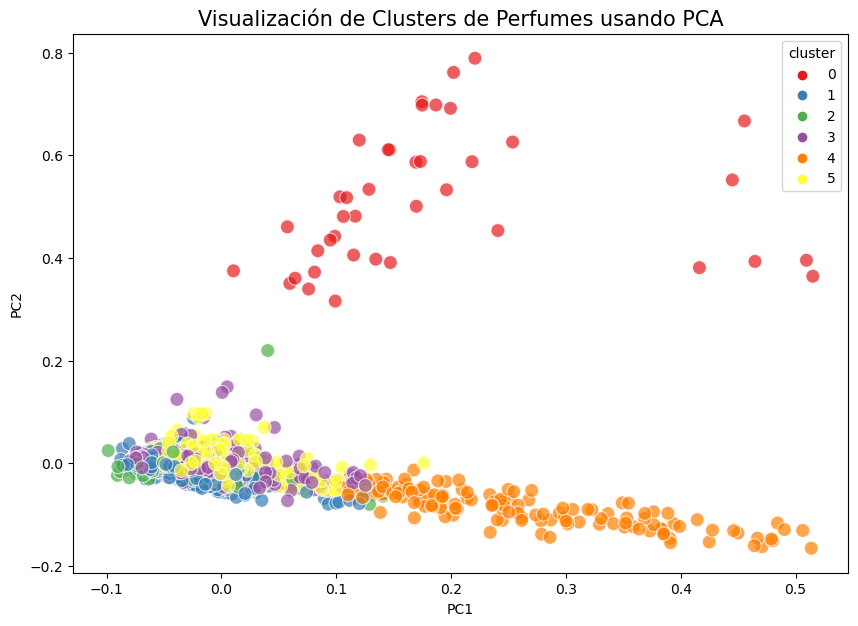

In [22]:


# Utilizaremos la matriz TF-IDF que ya fue creada anteriormente para clustering
num_clusters = 6  # Definir el número de clusters (puedes ajustar este número)

# Aplicar KMeans para agrupar los perfumes en clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df2['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Reducir las dimensiones para visualización con PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Crear un DataFrame con las componentes principales y el cluster asignado
df_pca = pd.DataFrame(data=tfidf_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df2['cluster']

# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='Set1', s=100, alpha=0.7)
plt.title('Visualización de Clusters de Perfumes usando PCA', fontsize=15)
plt.show()



c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


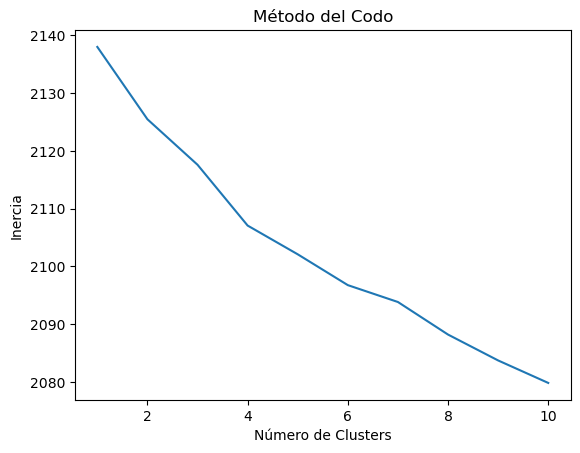

In [24]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [92]:
# Crea un csv con el df2
df2.to_csv('final_df2.csv', index=False)
